In [1]:
import numpy as np      
#per lavorare con vettori numerici e matrici in maniera più efficiente veloce 
#di quanto non si possa fare con le liste e le liste di matrici
import pandas as pd
#per la manipolazione, la pulizia e l'elaborazione dei dati
import matplotlib.pyplot as plt
#per disegnare grafici in 2d i vari modi
import math
#per estendee le funzionalità matematiche 

#sklearn è una libreria di open source di apprendimento automatico
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
df = pd.read_csv('datasets/father_son_heights.csv', sep='\t')
df #non vuole il percorso globale perchè sono nella stessa directory codice e dataset


,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


In [4]:
df['Father'].shape
#righe del dataset, osservazioni della colonna Father

(1078,)

In [5]:
x= df['Father'].values.reshape(-1,1)
y= df['Son']#.values.reshape(-1,1)

#reshape (-1,1) significa che prendiamo i valori della column di pandas (array monodimensionale di dimensone N)
#e lo trasformiamo in un vettore colonna di dimensioni (N,1)
#(-1 sevre a ricavare la dimensione originale della column di pandas) 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(y_train.shape)
#754 osservazioni per y.train, le restanti sono per y_test
#0.3 indica che vogliamo utilizzare il 30% delle osservazioni per il dataset di test

(754,)


In [9]:
sgd_reg=SGDRegressor(   #regressore lineare che funziona con metodo gradient descent
    max_iter=400000,    #numero di epoche di addestramento
    learning_rate='adaptive',   #alpha=eta0 finchè il valore della funzione di costo continua a decrescere
                                #per ogni fallimento per un numero pari a n_iter_no_change consecutivi nella diminuzione della funzione di costo
                                #il learning rate corrente viene diviso per 5
    n_iter_no_change=50000
)
sgd_reg.fit(x_train,y_train)

/Users/uffa/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='adaptive', max_iter=400000, n_iter_no_change=50000)

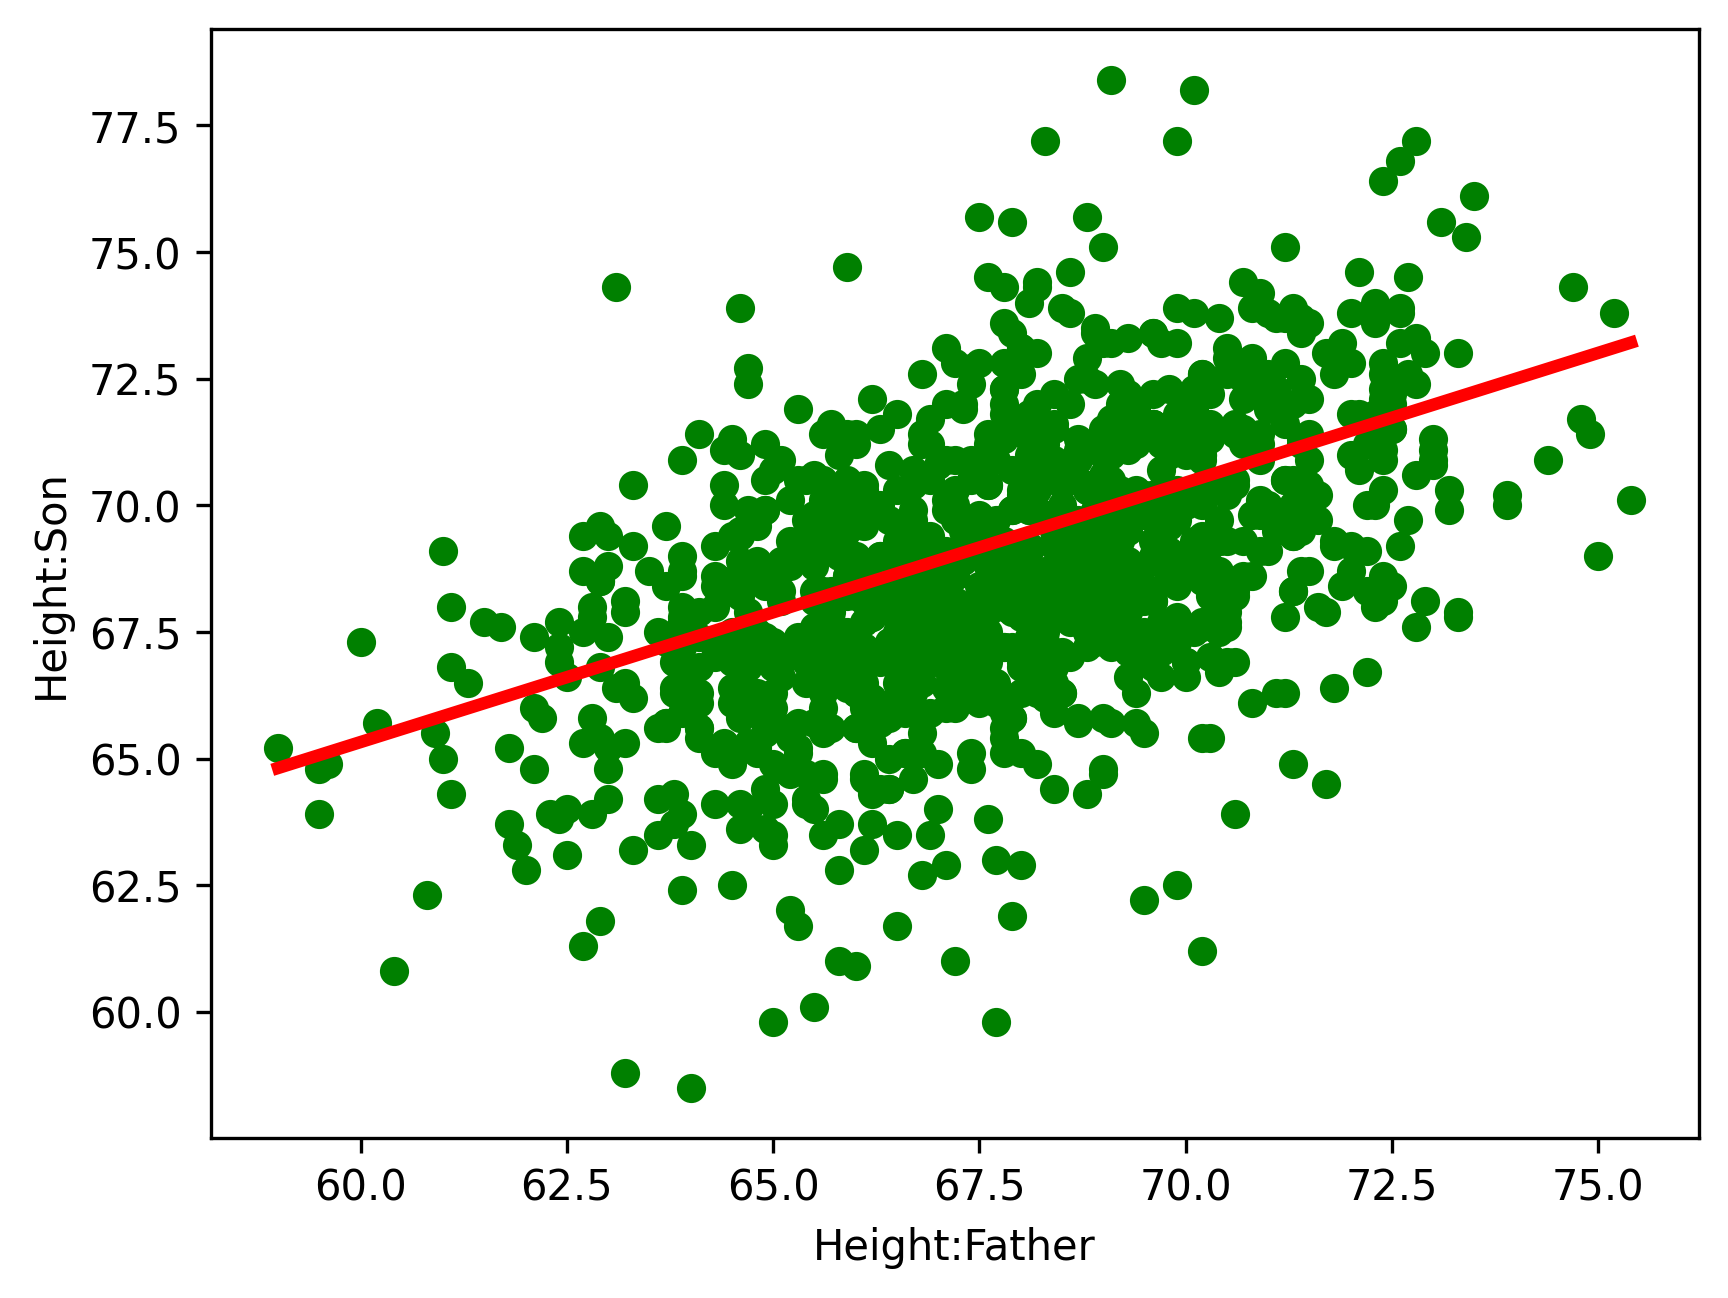

In [10]:
plt.scatter(x,y,color='g')
plt.xlabel('Height:Father')
plt.ylabel('Height:Son')

x_ht_samples=np.linspace(x.min(),x.max(), num=50) #spazio lineare come suddivisione in 50 osservazioni comprese tra x.min e x.max
y_ht_samples=sgd_reg.predict(x_ht_samples.reshape(-1,1)) #predizioni
plt.plot(x_ht_samples,y_ht_samples,color="r", linewidth=3) #rappresento le predizioni come una linea retta 
plt.show()


La retta rappresenta il mio modello dopo 400000 epoche di addestramento

In [11]:
y_pred=sgd_reg.predict(x_test)

print("MSE: ", mean_squared_error(y_test,y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

#print("RMSE2: ", root_mean_squared_error(y_test,y_pred))

MSE:  6.803196773075937
RMSE:  2.6082938433151925


/Users/uffa/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
reg= LinearRegression().fit(x_train,y_train) #non viene specificato nessun parametro () per usa il metodo dei minimi quadrati no il gd
y_pred=reg.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print("MSE: ",mse)
print("RMSE: ", mse**(1/2.0))

MSE:  6.25966575228162
RMSE:  2.5019324036195743


I valori di MSE e RMSE hanno valori minori per la linear regression rispetto a quelli della gradient descent quindi 400000 iterazioni non sono sufficienti per avere un livello di errore migliore rispetto alla linear regression.

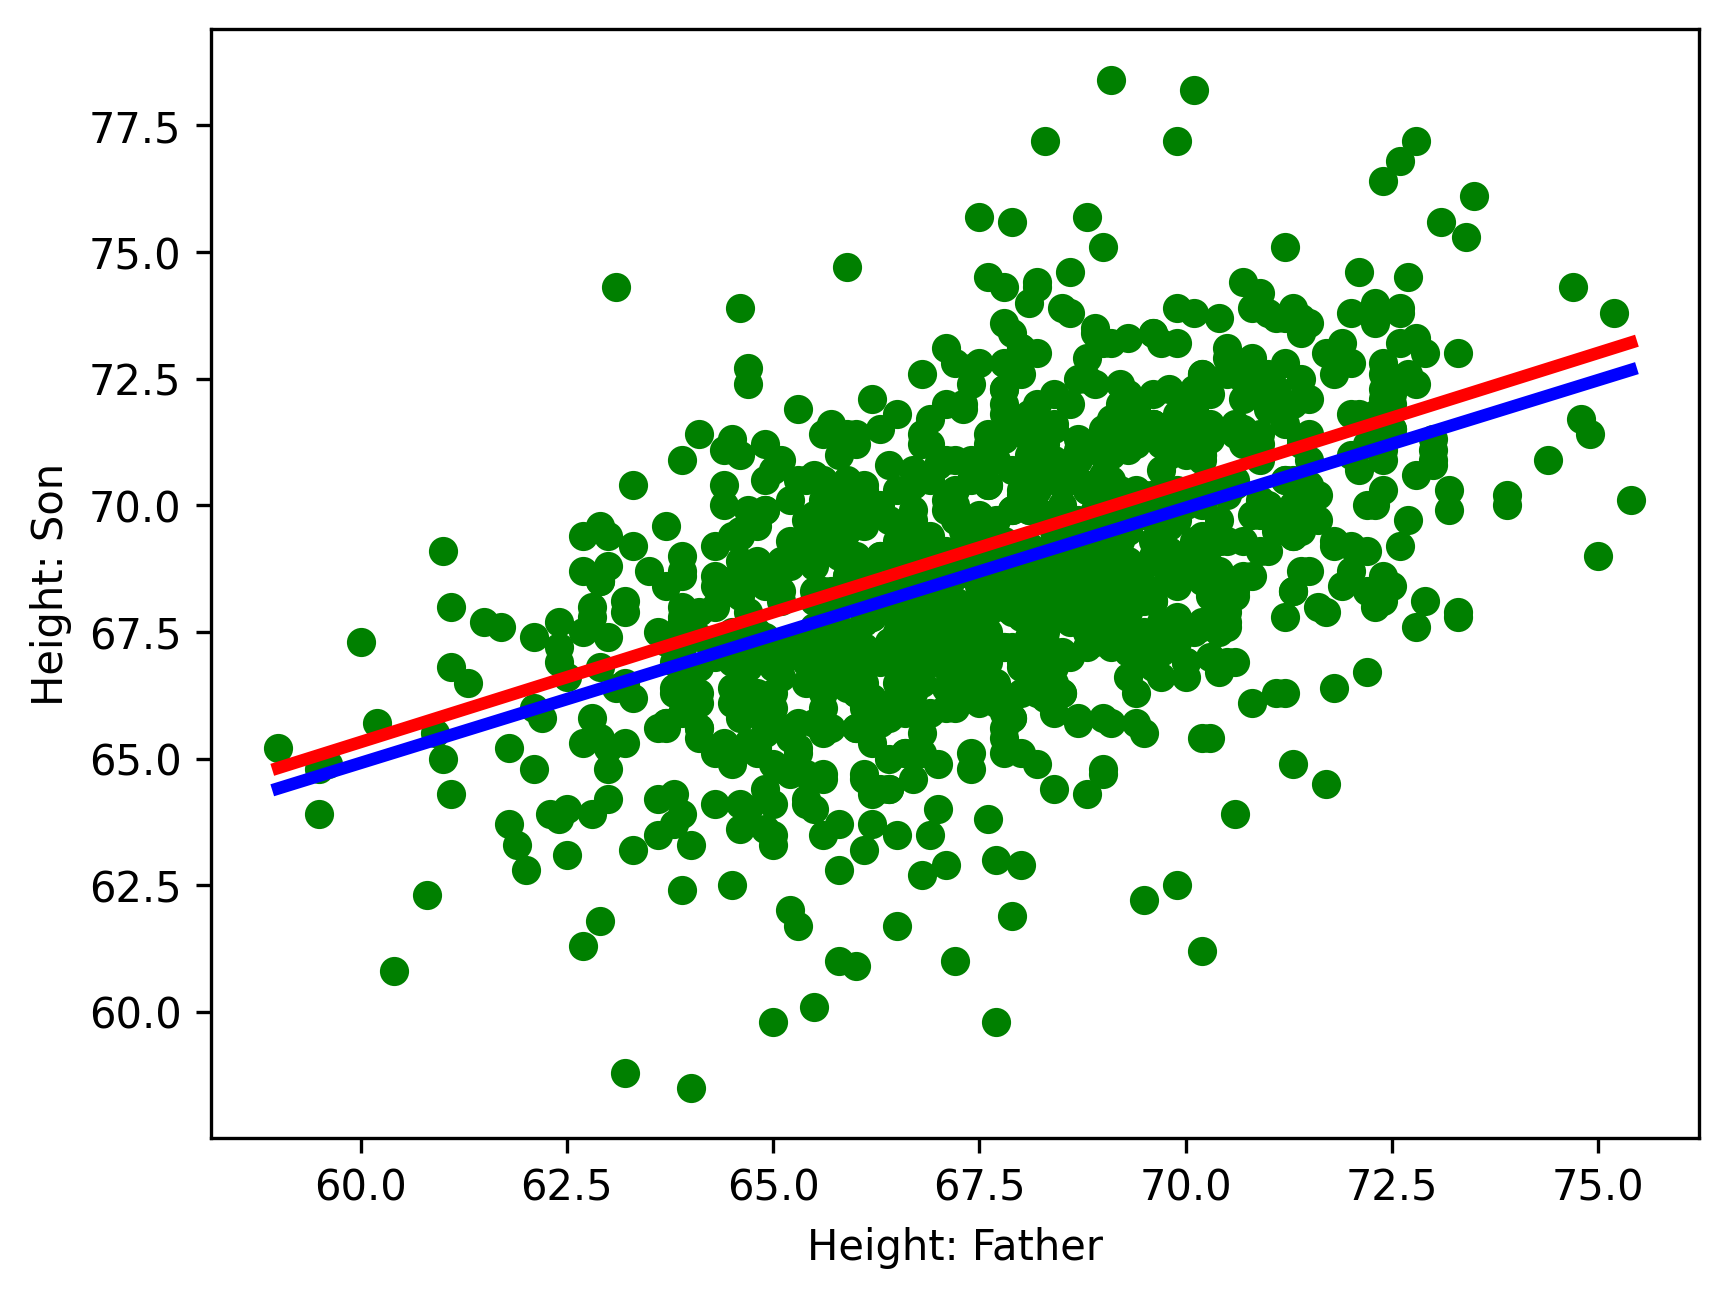

In [15]:
plt.scatter(x, y, color='g') # Scatter-plot of X & Y as in Step 3
plt.xlabel('Height: Father')
plt.ylabel('Height: Son')

x_ht_samples = np.linspace(x.min(), x.max(), num=50)
sgd_prediction = sgd_reg.predict(x_ht_samples.reshape(-1,1))
reg_prediction = reg.predict(x_ht_samples.reshape(-1,1))
plt.plot(x_ht_samples, sgd_prediction, color='r', linewidth=3)
plt.plot(x_ht_samples, reg_prediction, color='b', linewidth=3)
plt.show()